<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
# from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
file = 'data/job_listings.csv'
DS = pd.read_csv(file, index_col=False)

# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                
# clean markdown from raw html

In [ ]:
pip install lxml

In [3]:
print(DS.shape)
DS.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
DS['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [5]:
DS['description'] = DS['description'].apply(lambda x: x.lower())
to_clean = DS['description'][0]
to_clean

'b"<div><div>job requirements:</div><ul><li><p>\\nconceptual understanding in machine learning models like nai\\xc2\\xa8ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least 2 of them</p>\\n</li><li><p>intermediate to expert level coding skills in python/r. (ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>exposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot2, dplyr, tidyr in r</p>\\n</li><li><p>ability to communicate model findings to both technical and non-technical stake holders</p>\\n</li><li><p>hands on experience in sql/hive or similar programming language</p>\\n</li><li><p>must show past work via github, kaggle or any other published article</p>\\n</li><li><p>master\'s degree in statistics/mathematics/computer science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [6]:
soup = BeautifulSoup(to_clean).text
soup

'b"job requirements:\\nconceptual understanding in machine learning models like nai\\xc2\\xa8ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least 2 of them\\nintermediate to expert level coding skills in python/r. (ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nexposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot2, dplyr, tidyr in r\\nability to communicate model findings to both technical and non-technical stake holders\\nhands on experience in sql/hive or similar programming language\\nmust show past work via github, kaggle or any other published article\\nmaster\'s degree in statistics/mathematics/computer science or any other quant specific field.\\napply now"'

In [7]:
clean_text = re.sub("\\\\n", '', soup)
clean_text

'b"job requirements:conceptual understanding in machine learning models like nai\\xc2\\xa8ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least 2 of themintermediate to expert level coding skills in python/r. (ability to write functions, clean and efficient data manipulation are mandatory for this role)exposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot2, dplyr, tidyr in rability to communicate model findings to both technical and non-technical stake holdershands on experience in sql/hive or similar programming languagemust show past work via github, kaggle or any other published articlemaster\'s degree in statistics/mathematics/computer science or any other quant specific field.apply now"'

In [8]:
no_html = []
for text in DS['description']:
    no_html_text = BeautifulSoup(text).text
    no_html_text = re.sub('\\\\n', '', no_html_text)
    no_html.append(no_html_text)
DS['description'] = no_html

In [9]:
DS.head()

,Unnamed: 0,description,title
0,0,"b""job requirements:conceptual understanding in...",Data scientist
1,1,"b'job descriptionas a data scientist 1, you wi...",Data Scientist I
2,2,b'as a data scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthcontractunder the gen...",Data Scientist
4,4,b'location: usa \xe2\x80\x93 multiple location...,Data Scientist


In [10]:
DS['description'][0]

'b"job requirements:conceptual understanding in machine learning models like nai\\xc2\\xa8ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least 2 of themintermediate to expert level coding skills in python/r. (ability to write functions, clean and efficient data manipulation are mandatory for this role)exposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot2, dplyr, tidyr in rability to communicate model findings to both technical and non-technical stake holdershands on experience in sql/hive or similar programming languagemust show past work via github, kaggle or any other published articlemaster\'s degree in statistics/mathematics/computer science or any other quant specific field.apply now"'

## 2) Use Spacy to tokenize the listings 

In [11]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [12]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [13]:
# try on my sample data
tokenize(clean_text)

['b"job',
 'requirement',
 'conceptual',
 'understanding',
 'machine',
 'learning',
 'model',
 'like',
 'nai\\xc2\\xa8ve',
 'bayes',
 'k',
 'means',
 'svm',
 'apriori',
 'linear/',
 'logistic',
 'regression',
 'neural',
 'random',
 'forest',
 'decision',
 'tree',
 'k',
 'nn',
 'hand',
 'experience',
 '2',
 'themintermediate',
 'expert',
 'level',
 'coding',
 'skill',
 'python',
 'r',
 'ability',
 'write',
 'function',
 'clean',
 'efficient',
 'datum',
 'manipulation',
 'mandatory',
 'role)exposure',
 'package',
 'like',
 'numpy',
 'scipy',
 'panda',
 'matplotlib',
 'etc',
 'python',
 'ggplot2',
 'dplyr',
 'tidyr',
 'rability',
 'communicate',
 'model',
 'finding',
 'technical',
 'non',
 'technical',
 'stake',
 'holdershand',
 'experience',
 'sql',
 'hive',
 'similar',
 'programming',
 'languagemust',
 'past',
 'work',
 'github',
 'kaggle',
 'publish',
 'articlemaster',
 'degree',
 'statistic',
 'mathematic',
 'computer',
 'science',
 'quant',
 'specific',
 'field.apply']

In [14]:
# two ways how to apply 'tokenize' to a data
DS['tokens'] = DS['description'].apply(tokenize)

# new_tokens = []
# for text in DS['description']:
#     strip_text = tokenize(text)
#     new_tokens.append(strip_text)
# DS['tokens'] = new_tokens

In [15]:
DS.head()

,Unnamed: 0,description,title,tokens
0,0,"b""job requirements:conceptual understanding in...",Data scientist,"[b""job, requirement, conceptual, understanding..."
1,1,"b'job descriptionas a data scientist 1, you wi...",Data Scientist I,"[b'job, descriptionas, data, scientist, 1, hel..."
2,2,b'as a data scientist you will be working on c...,Data Scientist - Entry Level,"[b'as, data, scientist, work, consult, busines..."
3,3,"b'$4,969 - $6,756 a monthcontractunder the gen...",Data Scientist,"[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'location: usa \xe2\x80\x93 multiple location...,Data Scientist,"[b'location, usa, \xe2\x80\x93, multiple, loca..."


In [16]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
DS['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('datum', 2886),
 ('work', 1387),
 ('data', 1326),
 ('team', 1203),
 ('business', 1171),
 ('experience', 1153),
 ('science', 924),
 ('product', 825),
 ('model', 748),
 ('analysis', 699)]

In [17]:
DS_tokens = DS['tokens']
DS_tokens[0:10]

0    [b"job, requirement, conceptual, understanding...
1    [b'job, descriptionas, data, scientist, 1, hel...
2    [b'as, data, scientist, work, consult, busines...
3    [b'$4,969, $, 6,756, monthcontractunder, gener...
4    [b'location, usa, \xe2\x80\x93, multiple, loca...
5    [b'create, business, intelligence, analytical,...
6    [b'as, spotify, premium, swell, 96, m, subscri...
7    [b"everytown, gun, safety, nation, large, gun,...
8    [b"ms, quantitative, discipline, statistic, ma...
9    [b'slack, hire, experienced, datum, scientist,...
Name: tokens, dtype: object

In [18]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [19]:
wc = count(DS['tokens'])
wc[0:5]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
43,datum,411,2886,1.0,0.022591,0.022591,0.964789
22,work,365,1387,2.0,0.010857,0.033448,0.856808
262,data,378,1326,3.0,0.010380,0.043828,0.887324
228,team,359,1203,4.0,0.009417,0.053245,0.842723
296,business,319,1171,5.0,0.009166,0.062411,0.748826


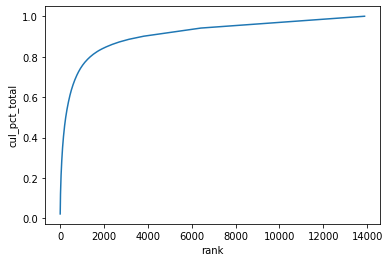

In [20]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [ ]:
nlp.Defaults.stop_words

In [26]:
# add some additional tokens
STOP_WORDS = nlp.Defaults.stop_words.union(['and', 'a', 'i', 'to', 'I', ' ', ' -', '-', '1', 'date', '/', 'amazon', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

In [27]:
# Tokenizer Pipe for reviews


tokens = []

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

""" Make them tokens """
for doc in tokenizer.pipe(DS['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
DS['tokens'] = tokens

In [28]:
wc = count(DS['tokens'])
wc[0:5]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
56,data,419,3751,1.0,0.029842,0.029842,0.983568
313,business,303,1008,2.0,0.008019,0.037862,0.711268
11,experience,357,944,3.0,0.007510,0.045372,0.838028
7,work,326,876,4.0,0.006969,0.052341,0.765258
238,team,314,726,5.0,0.005776,0.058117,0.737089


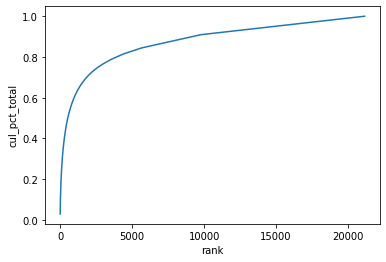

In [29]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [30]:
DS.head()

,Unnamed: 0,description,title,tokens
0,0,"b""job requirements:conceptual understanding in...",Data scientist,"[b""job, requirements:conceptual, understanding..."
1,1,"b'job descriptionas a data scientist 1, you wi...",Data Scientist I,"[b'job, descriptionas, data, scientist, 1,, he..."
2,2,b'as a data scientist you will be working on c...,Data Scientist - Entry Level,"[b'as, data, scientist, working, consulting, b..."
3,3,"b'$4,969 - $6,756 a monthcontractunder the gen...",Data Scientist,"[b'$4,969, $6,756, monthcontractunder, general..."
4,4,b'location: usa \xe2\x80\x93 multiple location...,Data Scientist,"[b'location:, usa, \xe2\x80\x93, multiple, loc..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [31]:
DS.shape

(426, 4)

In [32]:
len(DS['description'])

426

In [33]:
data = DS['description']

In [34]:
##### Your Code Here #####
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

# Word counts
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.shape

(426, 11808)

In [35]:
print(dtm)

     00  000  000pay  02115job  03  0356  04  062  06366  08  ...  zenreach  \
0     0    0       0         0   0     0   0    0      0   0  ...         0   
1     0    0       0         0   0     0   0    0      0   0  ...         0   
2     0    0       0         0   0     0   0    0      0   0  ...         0   
3     0    0       0         0   0     0   0    0      0   0  ...         0   
4     0    0       0         0   0     0   0    0      0   0  ...         0   
..   ..  ...     ...       ...  ..   ...  ..  ...    ...  ..  ...       ...   
421   0    0       0         0   0     0   0    0      0   0  ...         0   
422   0    0       0         0   0     0   0    0      0   0  ...         0   
423   0    2       0         0   0     0   0    0      0   0  ...         0   
424   0    0       0         0   0     0   0    0      0   0  ...         0   
425   0    1       0         0   0     0   0    0      0   0  ...         0   

     zero  zeus  zf  zheng  zillow  zonesability  z

In [36]:
print(vect.get_feature_names())

['00', '000', '000pay', '02115job', '03', '0356', '04', '062', '06366', '08', '0deep', '10', '100', '1000', '1001', '1008', '100k', '100x', '105', '1079302who', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802wireless', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334brjob', '17', '170', '17b', '18', '180', '180008jqzurich', '18b', '19', '190', '190007jipreferred', '19000bn4preferred', '19000c1kno', '19004162schedule', '1901744descriptionthe', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1level', '1st', '1strategy', '1tb', '1under', '20', '200', '2000', '200020183changing', '200041695at', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2018role', '2019', '2019about', '2019apply', '2019ericsson', '2019expiration', '2019position', '2019responsibilities', '2019role', '2019weekly', '20

In [37]:
dtm.head()

,00,000,000pay,02115job,03,0356,04,062,06366,08,...,zenreach,zero,zeus,zf,zheng,zillow,zonesability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Comparing to the first row of data

doc_len = [len(doc) for doc in data]

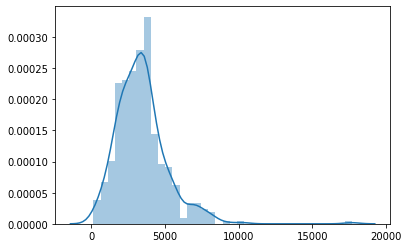

In [39]:
import seaborn as sns

sns.distplot(doc_len);

## 4) Visualize the most common word counts

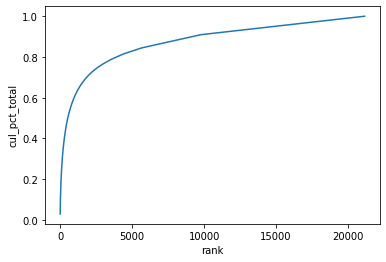

In [40]:
##### Your Code Here #####
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [41]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.11332283163874171

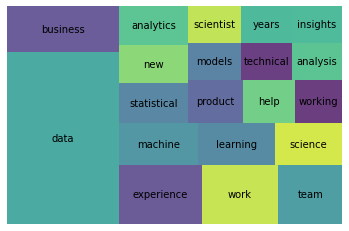

In [42]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = ['english', '10', '100', '000', '11', '12', '15', '17', '18',
                                     '19', '20', '200', '2013', '2015', '2017', '2018', '2019'],
                        # tokenizer = tokenize,
                        ngram_range = (1,2),
                        min_df = 5, 
                        max_df = 0.6,
                        # max_features = 5000
                       )

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(426, 9159)


,24,25,30,3rd,3rd party,40,401,401k,50,500,...,your life,your opportunity,your own,your request,your resume,your skills,your team,your work,yourself,youyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.081036,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [44]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [45]:
# Turn it into a DataFrame

df = pd.DataFrame(dist_matrix)

In [46]:
print(df.shape)
df.head()

(426, 426)


,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,1.000000,0.048363,0.022881,0.004325,0.022562,0.081082,0.007694,0.046194,0.061406,0.020706,...,0.055607,0.053208,0.039375,0.047643,0.042204,0.011366,0.013425,0.017734,0.059053,0.067397
1,0.048363,1.000000,0.064743,0.020561,0.019074,0.073408,0.098968,0.078899,0.117151,0.084392,...,0.101653,0.132603,0.042371,0.102412,0.098204,0.100116,0.048171,0.095912,0.071930,0.078535
2,0.022881,0.064743,1.000000,0.011864,0.028406,0.036411,0.047754,0.076033,0.066980,0.030363,...,0.049705,0.030379,0.042352,0.062665,0.057229,0.044075,0.012588,0.038293,0.051212,0.060926
3,0.004325,0.020561,0.011864,1.000000,0.000000,0.035898,0.025557,0.100883,0.037910,0.052862,...,0.051351,0.031572,0.009618,0.053615,0.023978,0.070647,0.018369,0.078717,0.072552,0.097062
4,0.022562,0.019074,0.028406,0.000000,1.000000,0.035571,0.002048,0.032276,0.025690,0.010770,...,0.009993,0.055533,0.014826,0.059115,0.001805,0.007565,0.005525,0.010007,0.003614,0.052705


In [47]:
# Each row is the similarity of one document to all other documents (including itself)
df[0][:5]

0    1.000000
1    0.048363
2    0.022881
3    0.004325
4    0.022562
Name: 0, dtype: float64

In [48]:
# Grab the row
df[df[0] < 1][0].sort_values(ascending=False)[:5]

168    0.124678
338    0.124654
199    0.119995
403    0.114141
393    0.113443
Name: 0, dtype: float64

In [49]:
print(data[0][:168])

b"job requirements:conceptual understanding in machine learning models like nai\xc2\xa8ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random fore


In [50]:
print(data[168][:338])

b"logistics done differently.at xpo logistics, we invest over $450 million in technology every year so that we can continue to develop state-of-the-art solutions for our customers. as the data scientist, you will be responsible for developing analytical experiments in a methodical manner and regularly evaluating alternate models to supp


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [51]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [52]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.32311867, 1.32313705, 1.32665348, 1.33105908]]),
 array([[  0, 168, 338, 199, 403]]))

In [55]:
data[0][:200]

'b"job requirements:conceptual understanding in machine learning models like nai\\xc2\\xa8ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along '

In [56]:
data[199][:200]

"b'the data science & analytics practice group at capgemini is expanding its footprint\\xe2\\x80\\xa6rapidly. as part of the fastest growing digital practice within capgemini, we work with the latest adva"

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 